In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
train=pd.read_csv("prices-split-adjusted.csv")

In [13]:
train.tail()

,date,symbol,open,close,low,high,volume
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
851263,2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [4]:
train.drop(["Name"],axis=1,inplace=True)

In [5]:
train

,Date,Open,High,Low,Close,Volume
0,2006-01-03,57.87,58.11,57.05,57.80,3697500
1,2006-01-04,57.95,59.43,57.55,59.27,4577200
2,2006-01-05,59.02,59.86,59.00,59.27,4590700
3,2006-01-06,59.47,60.76,59.38,60.45,5692300
4,2006-01-09,60.45,61.68,60.45,61.55,4409300
...,...,...,...,...,...,...
3015,2017-12-22,154.77,155.80,153.95,155.75,2486378
3016,2017-12-26,156.04,156.98,155.66,156.44,1870565
3017,2017-12-27,156.94,157.69,156.31,157.52,2520486
3018,2017-12-28,157.94,158.65,157.23,158.42,4064049


In [15]:
train["date"]=pd.to_datetime(train["date"],infer_datetime_format=True)

/var/folders/1g/0mj97r555d15d54dx2257j7m0000gn/T/ipykernel_43902/3585436080.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  train["date"]=pd.to_datetime(train["date"],infer_datetime_format=True)


In [16]:
train=train.set_index(['date'])

In [17]:
train.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [18]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6


Text(0.5, 0, 'open')

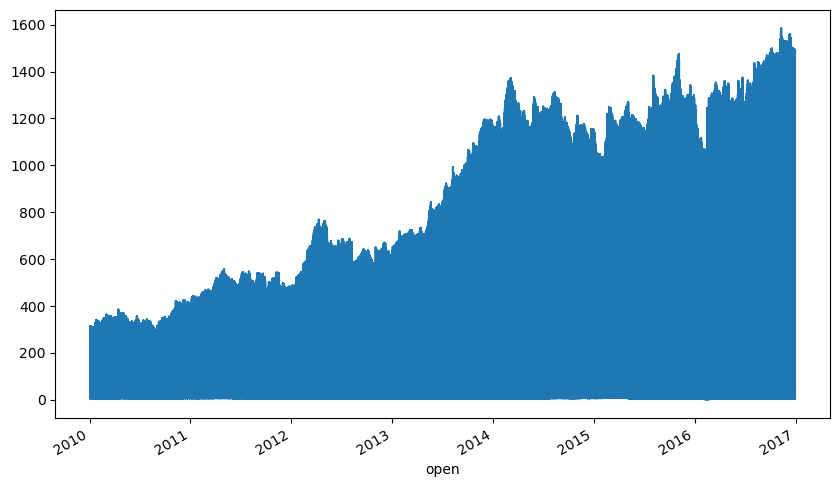

In [20]:
train["open"].plot()
plt.xlabel("open")

Text(0.5, 0, 'High')

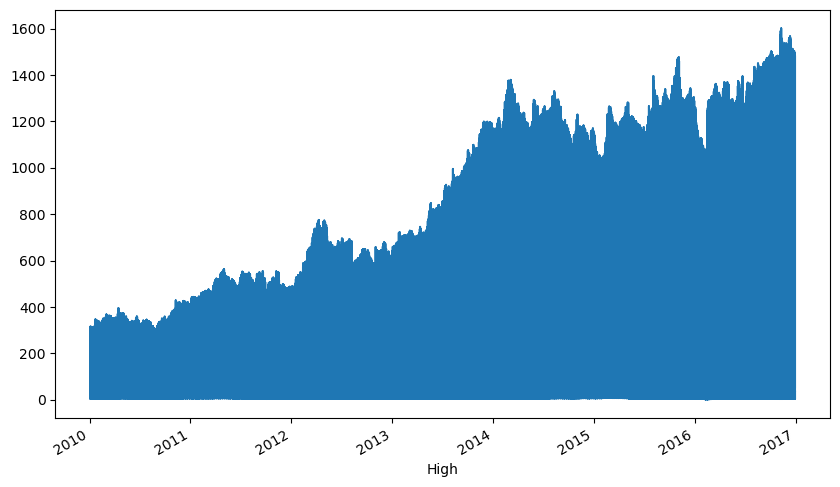

In [21]:
train["high"].plot()
plt.xlabel("High")

Text(0.5, 0, 'Low')

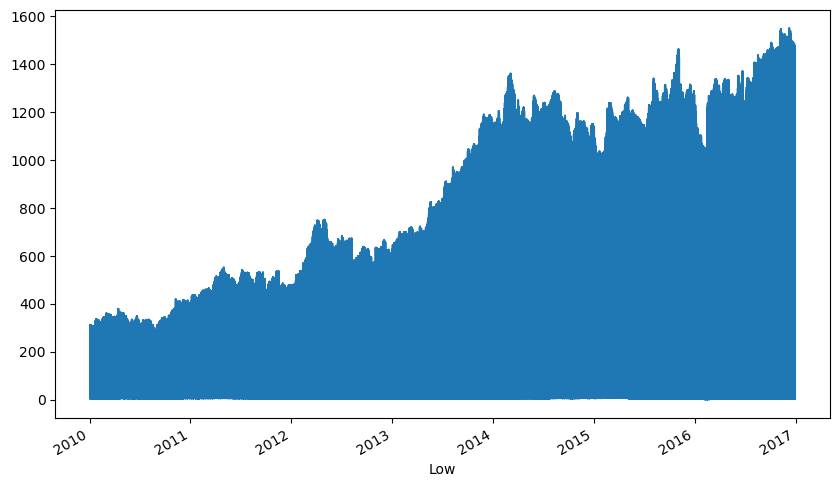

In [22]:
train["low"].plot()
plt.xlabel("Low")

Text(0.5, 0, 'Close')

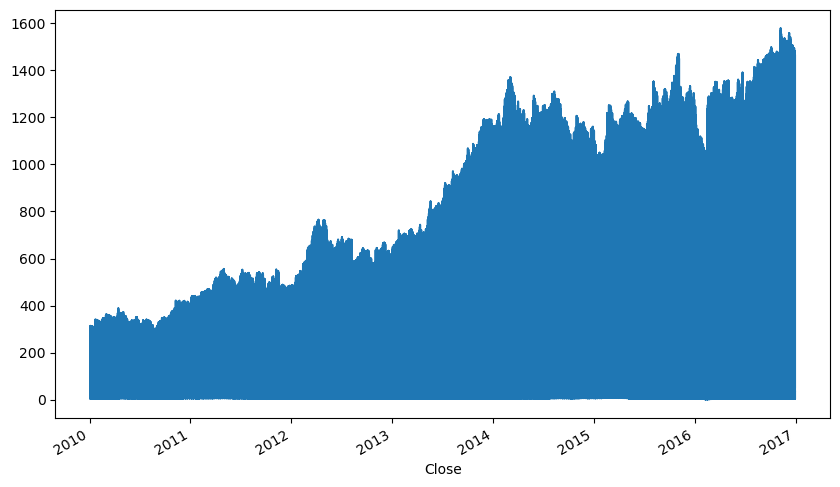

In [23]:
train["close"].plot()
plt.xlabel("Close")

Text(0.5, 0, 'Volume')

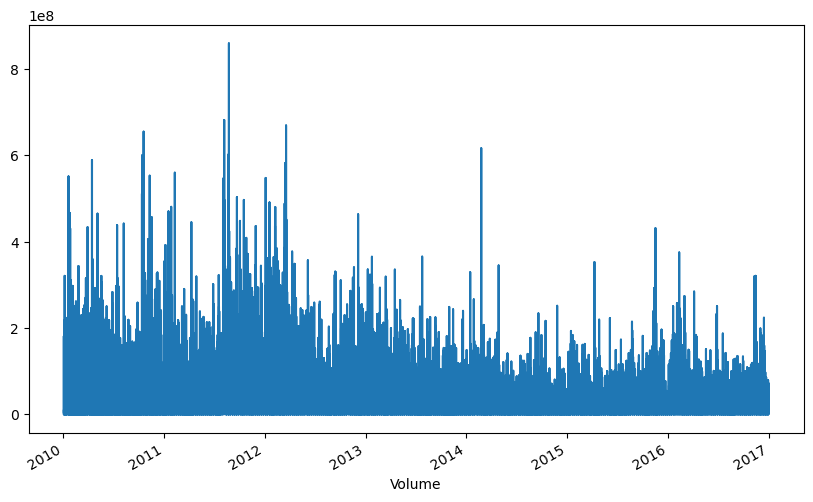

In [24]:
train["volume"].plot()
plt.xlabel("Volume")

In [25]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale=scale.fit(train)
data=scale.transform(train)

/Users/sibivishtan/anaconda3/envs/cive_env/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/sibivishtan/anaconda3/envs/cive_env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sibivishtan/anaconda3/envs/cive_env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


ValueError: could not convert string to float: 'WLTW'

In [26]:
def sss(w):
    t1,t2=w.shape
    a=[]
    t={}
    for i in range(t2):
        for j in range(t1):
                a.append(w[j][i])
        ss=pd.Series(a)
        t.update({i:ss})
        a=[]
    k=[]
    for i,j in t.items():
        k.append(j)
    ww=pd.concat(k,axis=1)
    n=len(ww.columns)
    for i in range(n):
         ww[n+i]=ww[i].shift(-1)
    return ww
    

In [17]:
w=sss(data)

In [18]:
w

,0,1,2,3,4,5,6,7,8,9
0,0.260118,0.257240,0.260236,0.261505,0.052048,0.260709,0.266992,0.263918,0.272294,0.065056
1,0.260709,0.266992,0.263918,0.272294,0.065056,0.268612,0.270168,0.274595,0.272294,0.065255
2,0.268612,0.270168,0.274595,0.272294,0.065255,0.271935,0.276817,0.277393,0.280954,0.081544
3,0.271935,0.276817,0.277393,0.280954,0.081544,0.279173,0.283614,0.285272,0.289028,0.062573
4,0.279173,0.283614,0.285272,0.289028,0.062573,0.285820,0.282432,0.286672,0.287193,0.044515
...,...,...,...,...,...,...,...,...,...,...
3015,0.975775,0.978945,0.973785,0.980404,0.034139,0.985155,0.987663,0.986377,0.985468,0.025033
3016,0.985155,0.987663,0.986377,0.985468,0.025033,0.991802,0.992908,0.991163,0.993394,0.034644
3017,0.991802,0.992908,0.991163,0.993394,0.034644,0.999188,1.000000,0.997938,1.000000,0.057468
3018,0.999188,1.000000,0.997938,1.000000,0.057468,1.000000,0.998892,1.000000,0.993835,0.036058


In [19]:
w.fillna(method='ffill',inplace=True)

In [20]:
w.drop([6,7,8,9],axis=1,inplace=True)


In [21]:
w

,0,1,2,3,4,5
0,0.260118,0.257240,0.260236,0.261505,0.052048,0.260709
1,0.260709,0.266992,0.263918,0.272294,0.065056,0.268612
2,0.268612,0.270168,0.274595,0.272294,0.065255,0.271935
3,0.271935,0.276817,0.277393,0.280954,0.081544,0.279173
4,0.279173,0.283614,0.285272,0.289028,0.062573,0.285820
...,...,...,...,...,...,...
3015,0.975775,0.978945,0.973785,0.980404,0.034139,0.985155
3016,0.985155,0.987663,0.986377,0.985468,0.025033,0.991802
3017,0.991802,0.992908,0.991163,0.993394,0.034644,0.999188
3018,0.999188,1.000000,0.997938,1.000000,0.057468,1.000000


In [22]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3020 non-null   float64
 1   1       3020 non-null   float64
 2   2       3020 non-null   float64
 3   3       3020 non-null   float64
 4   4       3020 non-null   float64
 5   5       3020 non-null   float64
dtypes: float64(6)
memory usage: 141.7 KB


In [23]:
www=w.values

In [24]:
xtrain,xtest,ytrain,ytest=www[:2015,0:5],www[2015:,0:5],www[:2015,-1],www[2015:,-1]

In [25]:
xtes=xtest

In [26]:
xtes

array([[0.49881832, 0.49505024, 0.49094256, 0.48785321, 0.0748028 ],
       [0.48833087, 0.48714539, 0.49366716, 0.48998165, 0.04937134],
       [0.48840473, 0.49150414, 0.49307806, 0.49152294, 0.06280644],
       ...,
       [0.99180207, 0.9929078 , 0.99116348, 0.9933945 , 0.03464359],
       [0.99918759, 1.        , 0.99793814, 1.        , 0.05746773],
       [1.        , 0.99889184, 1.        , 0.99383486, 0.03605802]])

In [27]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout
from keras.layers import Bidirectional

In [29]:
model=Sequential()
model.add(Bidirectional(LSTM(50,activation="relu",return_sequences=True,input_shape=(xtrain.shape[1],xtrain.shape[2]))))
model.add(LSTM(50,activation="relu"))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [30]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50,batch_size=32,verbose=2)

Epoch 1/50
63/63 - 2s - loss: 0.0413 - val_loss: 0.0040
Epoch 2/50
63/63 - 2s - loss: 0.0015 - val_loss: 1.5270e-04
Epoch 3/50
63/63 - 2s - loss: 1.8234e-04 - val_loss: 1.2900e-04
Epoch 4/50
63/63 - 2s - loss: 1.4642e-04 - val_loss: 1.0411e-04
Epoch 5/50
63/63 - 2s - loss: 1.4358e-04 - val_loss: 1.1410e-04
Epoch 6/50
63/63 - 3s - loss: 1.1460e-04 - val_loss: 9.5196e-05
Epoch 7/50
63/63 - 2s - loss: 1.0948e-04 - val_loss: 1.0726e-04
Epoch 8/50
63/63 - 2s - loss: 9.2553e-05 - val_loss: 8.4806e-05
Epoch 9/50
63/63 - 2s - loss: 9.1431e-05 - val_loss: 1.1435e-04
Epoch 10/50
63/63 - 2s - loss: 8.5612e-05 - val_loss: 8.1576e-05
Epoch 11/50
63/63 - 2s - loss: 8.2235e-05 - val_loss: 7.7044e-05
Epoch 12/50
63/63 - 2s - loss: 8.7482e-05 - val_loss: 1.1123e-04
Epoch 13/50
63/63 - 2s - loss: 9.6915e-05 - val_loss: 9.4107e-05
Epoch 14/50
63/63 - 2s - loss: 1.0116e-04 - val_loss: 1.0047e-04
Epoch 15/50
63/63 - 2s - loss: 8.8467e-05 - val_loss: 1.4069e-04
Epoch 16/50
63/63 - 2s - loss: 8.6188e-05 - va

In [31]:
y_pred=model.predict(xtest)

In [32]:
y_pred[:5]

array([[0.49490774],
       [0.49019116],
       [0.4918716 ],
       [0.4937003 ],
       [0.49809003]], dtype=float32)

In [33]:
from numpy import concatenate

In [34]:
y_pred= concatenate((y_pred,xtes[:, 1:]), axis=1)

In [35]:
xtes[:5]

array([[0.49881832, 0.49505024, 0.49094256, 0.48785321, 0.0748028 ],
       [0.48833087, 0.48714539, 0.49366716, 0.48998165, 0.04937134],
       [0.48840473, 0.49150414, 0.49307806, 0.49152294, 0.06280644],
       [0.49194978, 0.49135638, 0.49315169, 0.49570642, 0.0634702 ],
       [0.49305761, 0.49726655, 0.49764359, 0.50157798, 0.07748085]])

In [36]:
y_pred[:5]

array([[0.49490774, 0.49505024, 0.49094256, 0.48785321, 0.0748028 ],
       [0.49019116, 0.48714539, 0.49366716, 0.48998165, 0.04937134],
       [0.4918716 , 0.49150414, 0.49307806, 0.49152294, 0.06280644],
       [0.4937003 , 0.49135638, 0.49315169, 0.49570642, 0.0634702 ],
       [0.49809003, 0.49726655, 0.49764359, 0.50157798, 0.07748085]])

In [37]:
y_pred = scale.inverse_transform(y_pred)

In [38]:
ypred= y_pred[:,0]
y_pred[:5]

array([[8.96605076e+01, 9.03000000e+01, 8.83800000e+01, 8.86400000e+01,
        5.23639400e+06],
       [8.90218833e+01, 8.92300000e+01, 8.87500000e+01, 8.89300000e+01,
        3.51650200e+06],
       [8.92494140e+01, 8.98200000e+01, 8.86700000e+01, 8.91400000e+01,
        4.42509800e+06],
       [8.94970200e+01, 8.98000000e+01, 8.86800000e+01, 8.97100000e+01,
        4.46998700e+06],
       [9.00913899e+01, 9.06000000e+01, 8.92900000e+01, 9.05100000e+01,
        5.41750600e+06]])

In [39]:
ytest = ytest.reshape((len(ytest), 1))

In [40]:
ytest[:5]

array([[0.48833087],
       [0.48840473],
       [0.49194978],
       [0.49305761],
       [0.4993353 ]])

In [41]:

from numpy import concatenate

In [42]:
ytest= concatenate((ytest,xtes[:, 1:]), axis=1)

In [43]:
y_test = scale.inverse_transform(ytest)

In [44]:
y_test=y_test[:,0]
y_test[:5]

array([88.77, 88.78, 89.26, 89.41, 90.26])

In [45]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,ypred))

1.2589976389415958

BidirectionalLSTM=1.150973,BidirectionalLSTM1=1.245855,LSTM=1.502515,stackedlstm1-1.53426,stackedlstm2=1.790709,stackedlstm-2.1193

In [46]:
y_test[:5]

array([88.77, 88.78, 89.26, 89.41, 90.26])

In [47]:
ypred[:5]

array([89.66050756, 89.02188329, 89.24941401, 89.49702004, 90.09138989])